## **LOAD IMAGES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#copy zip from drive to colab
!cp /content/drive/MyDrive/Pneumonia_classification-20210606T120153Z-001.zip /content

#unzip
!unzip /content/Pneumonia_classification-20210606T120153Z-001.zip

#remove zipfile after unzip to reduce harddisk space
!rm /content/Pneumonia_classification-20210606T120153Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person762_virus_1390.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person74_bacteria_363.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0944-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person721_virus_1340.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0912-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0946-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person75_bacteria_365.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0937-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0942-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0957-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person645_virus_1226.jpe

In [ ]:
# check images in colab
import os

normal_image_names=os.listdir('/content/Pneumonia_classification/Data/NORMAL')
pneumonia_image_names=os.listdir('/content/Pneumonia_classification/Data/PNEUMONIA')

print(normal_image_names)
print('Number of normal images',len(normal_image_names))
print(pneumonia_image_names)
print('Number of pneumonia images',len(pneumonia_image_names))

['NORMAL2-IM-1343-0001.jpeg', 'NORMAL2-IM-0051-0001.jpeg', 'IM-0563-0001.jpeg', 'IM-0582-0001.jpeg', 'IM-0764-0001.jpeg', 'IM-0616-0001.jpeg', 'NORMAL2-IM-0689-0001.jpeg', 'NORMAL2-IM-0543-0001.jpeg', 'NORMAL2-IM-0381-0001.jpeg', 'NORMAL2-IM-0518-0001.jpeg', 'NORMAL2-IM-0814-0001.jpeg', 'NORMAL2-IM-0059-0001.jpeg', 'IM-0316-0001.jpeg', 'IM-0256-0001.jpeg', 'IM-0475-0001.jpeg', 'NORMAL2-IM-1113-0001.jpeg', 'NORMAL2-IM-0952-0001.jpeg', 'NORMAL2-IM-1287-0001.jpeg', 'NORMAL2-IM-0346-0001.jpeg', 'IM-0241-0001.jpeg', 'NORMAL2-IM-1147-0001.jpeg', 'NORMAL2-IM-1020-0001.jpeg', 'NORMAL2-IM-1247-0001.jpeg', 'IM-0502-0001.jpeg', 'NORMAL2-IM-1096-0001.jpeg', 'NORMAL2-IM-0509-0001.jpeg', 'NORMAL2-IM-0271-0001.jpeg', 'IM-0437-0001-0002.jpeg', 'IM-0724-0001.jpeg', 'NORMAL2-IM-0847-0001.jpeg', 'IM-0006-0001.jpeg', 'NORMAL2-IM-1084-0001.jpeg', 'IM-0651-0001.jpeg', 'IM-0520-0001.jpeg', 'NORMAL2-IM-0727-0001.jpeg', 'NORMAL2-IM-1177-0001.jpeg', 'NORMAL2-IM-1310-0001.jpeg', 'NORMAL2-IM-0525-0001.jpeg', 'NOR

# **LOAD LIBRARIES**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pickle


# **DATA PREPROCESSING**

## **Data Generator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dir='/content/Pneumonia_classification/Data'
batch_size=32


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 4686 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.


# **TRANSFER LEARNING**




## **InceptionV3**

87916544/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
146/146 [==============================] - 145s 763ms/step - loss: 5.7252 - accuracy: 0.6431 - val_loss: 1.8047 - val_accuracy: 0.7977
Epoch 2/100
146/146 [==============================] - 102s 698ms/step - loss: 1.5845 - accuracy: 0.8008 - val_loss: 1.0926 - val_accuracy: 0.8247
Epoch 3/100
146/146 [==============================] - 101s 695ms/step - loss: 1.0403 - accuracy: 0.8214 - val_loss: 0.8571 - val_accuracy: 0.8533
Epoch 4/100
146/146 [==============================] - 101s 696ms/step - loss: 0.8968 - accuracy: 0.8384 - val_loss: 0.7150 - val_accuracy: 0.8481
Epoch 5/100
146/146 [==============================] - 101s 695ms/step - loss: 0.7872 - accuracy: 0.8419 - val_loss: 0.5978 - val_accuracy: 0.8568
Epoch 6/100
146/146 [==============================] - 101s 691ms/step - loss: 0.7457 - accuracy: 0.8498 - val_loss: 0.7883 - val_accuracy: 0.8385
Epoch 7/100
146/146 [==============================] - 101s 693ms/step - loss: 0.6881 - accuracy: 0.8498 - val_loss: 0

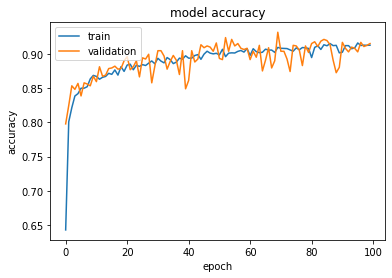

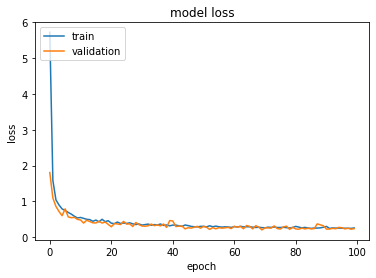

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/InceptionV3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/InceptionV3/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')


with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification_100epochs/inceptionv3_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification_100epochs/InceptionV3')


## **Resnet50V2**

94674944/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
146/146 [==============================] - 145s 773ms/step - loss: 2.0838 - accuracy: 0.7465 - val_loss: 1.8408 - val_accuracy: 0.7682
Epoch 2/100
146/146 [==============================] - 102s 698ms/step - loss: 1.3434 - accuracy: 0.8073 - val_loss: 1.4284 - val_accuracy: 0.7943
Epoch 3/100
146/146 [==============================] - 102s 699ms/step - loss: 1.1928 - accuracy: 0.8180 - val_loss: 1.1657 - val_accuracy: 0.8255
Epoch 4/100
146/146 [==============================] - 102s 698ms/step - loss: 1.0047 - accuracy: 0.8380 - val_loss: 0.9917 - val_accuracy: 0.8281
Epoch 5/100
146/146 [==============================] - 102s 696ms/step - loss: 0.9352 - accuracy: 0.8552 - val_loss: 1.1172 - val_accuracy: 0.8220
Epoch 6/100
146/146 [==============================] - 102s 697ms/step - loss: 0.7931 - accuracy: 0.8636 - val_loss: 1.1261 - val_accuracy: 0.8012
Epoch 7/100
146/146 [==============================] - 102s 700ms/step - loss: 0.7957 - accuracy: 0.8657 - val_loss: 0

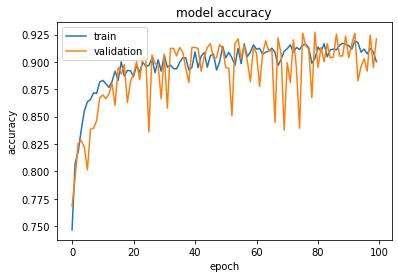

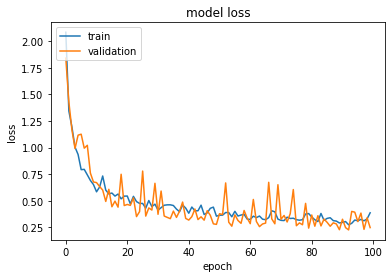

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/Resnet50V2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/Resnet50V2/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.ResNet50V2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification_100epochs/resnet50v2_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification_100epochs/Resnet50V2')

## **DenseNet121**

29089792/29084464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
146/146 [==============================] - 141s 724ms/step - loss: 0.6848 - accuracy: 0.7355 - val_loss: 0.5345 - val_accuracy: 0.7700
Epoch 2/100
146/146 [==============================] - 103s 704ms/step - loss: 0.5350 - accuracy: 0.7789 - val_loss: 0.5062 - val_accuracy: 0.7908
Epoch 3/100
146/146 [==============================] - 103s 708ms/step - loss: 0.4415 - accuracy: 0.8174 - val_loss: 0.4363 - val_accuracy: 0.7917
Epoch 4/100
146/146 [==============================] - 104s 714ms/step - loss: 0.4197 - accuracy: 0.8285 - val_loss: 0.3857 - val_accuracy: 0.8125
Epoch 5/100
146/146 [==============================] - 104s 709ms/step - loss: 0.3845 - accuracy: 0.8472 - val_loss: 0.3542 - val_accuracy: 0.8333
Epoch 6/100
146/146 [==============================] - 103s 705ms/step - loss: 0.3592 - accuracy: 0.8517 - val_loss: 0.3656 - val_accuracy: 0.8307
Epoch 7/100
146/146 [==============================] - 103s 709ms/step - loss: 0.3285 - accuracy: 0.8623 - val_loss: 0

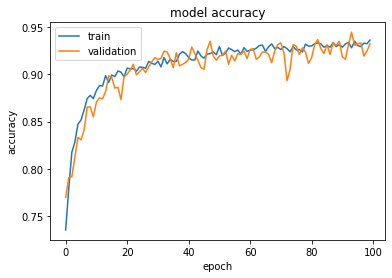

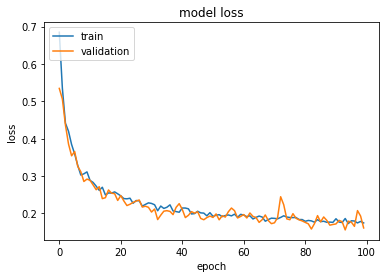

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/DenseNet121/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/DenseNet121/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.DenseNet121(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification_100epochs/densenet121_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification_100epochs/DenseNet121')

## **VGG19**

80142336/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
146/146 [==============================] - 116s 749ms/step - loss: 1.2108 - accuracy: 0.6549 - val_loss: 1.0556 - val_accuracy: 0.6675
Epoch 2/100
146/146 [==============================] - 107s 733ms/step - loss: 0.7438 - accuracy: 0.7460 - val_loss: 0.7797 - val_accuracy: 0.7335
Epoch 3/100
146/146 [==============================] - 107s 734ms/step - loss: 0.5630 - accuracy: 0.7927 - val_loss: 0.5826 - val_accuracy: 0.7769
Epoch 4/100
146/146 [==============================] - 108s 741ms/step - loss: 0.4712 - accuracy: 0.8272 - val_loss: 0.4786 - val_accuracy: 0.8177
Epoch 5/100
146/146 [==============================] - 107s 733ms/step - loss: 0.4102 - accuracy: 0.8470 - val_loss: 0.4185 - val_accuracy: 0.8464
Epoch 6/100
146/146 [==============================] - 108s 738ms/step - loss: 0.4020 - accuracy: 0.8520 - val_loss: 0.4080 - val_accuracy: 0.8403
Epoch 7/100
146/146 [==============================] - 107s 737ms/step - loss: 0.3353 - accuracy: 0.8730 - val_loss: 0

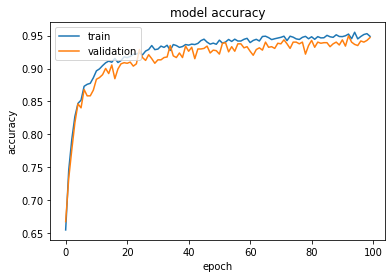

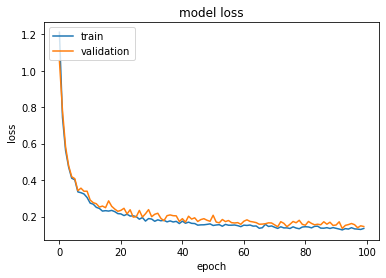

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/VGG19/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/VGG19/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.VGG19(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification_100epochs/vgg19_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification_100epochs/VGG19')

## **VGG16**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
146/146 [==============================] - 149s 774ms/step - loss: 1.5158 - accuracy: 0.6122 - val_loss: 1.0272 - val_accuracy: 0.6493
Epoch 2/100
146/146 [==============================] - 110s 755ms/step - loss: 0.8191 - accuracy: 0.7114 - val_loss: 0.6535 - val_accuracy: 0.7674
Epoch 3/100
146/146 [==============================] - 110s 752ms/step - loss: 0.6298 - accuracy: 0.7716 - val_loss: 0.5758 - val_accuracy: 0.8047
Epoch 4/100
146/146 [==============================] - 110s 756ms/step - loss: 0.5393 - accuracy: 0.8068 - val_loss: 0.4710 - val_accuracy: 0.8264
Epoch 5/100
146/146 [==============================] - 110s 753ms/step - loss: 0.4712 - accuracy: 0.8245 - val_loss: 0.4899 - val_accuracy: 0.8342
Epoch 6/100
146/146 [==============================] - 110s 752ms/step - loss: 0.4193 - accuracy: 0.8477 - val_loss: 0.4224 - val_accuracy: 0.8481
Epoch 7/100
146/146 [==============================] - 110s 756ms/step - loss: 0.4124 - accuracy: 0.8595 - val_loss: 0

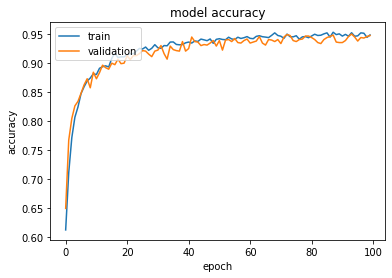

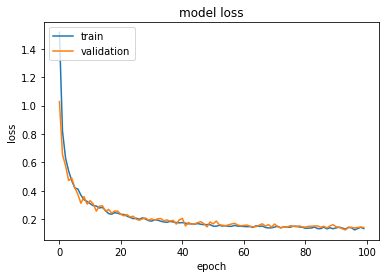

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/VGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification_100epochs/VGG16/assets


In [ ]:



base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 




model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 100)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification_100epochs/vgg16_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification_100epochs/VGG16')

In [ ]:
!nvidia-smi

Sun Jun 13 04:22:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     6W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------